#  Investigating Income Disparities among Racial and Gender Groups

By Eric Zhang, Primo Huang, Edmund Chu, Prajna 

Group 14: Project Proposal

# Introduction

Income inequality has long been an issue of interest and concern to people around the world. These differences have significant implications for individuals’ quality of life, access to opportunities, and overall well-being. Two of the major drivers of economic disparity is ethnicity and gender, as different groups tend to have different socioeconomic outcomes. Bertrand (2003) found that even having ethnic-sounding names affected the call back negatively compared to White sounding names, thus affecting income and job prospects.

This project proposal attempts to address an important question: Is there a significant difference in the likelihood of individuals earning an income greater than $50,000 ('>50K') among different racial and gender groups?" Akee et al(2017) have shown evidence that there are systematic differences between race across income however we will take a step further by examining the effect of gender. Specifically, we will investigate the income disparities among White and Black individuals, further stratified by gender. Our response variable of interest is the proportion of individuals with income '>50K' within each subgroup. Our goal is to explore this question more thoroughly using statistical methods to gain valuable insights into the income inequality of our study population.

We use data from https://archive.ics.uci.edu/dataset/20/census+income . This dataset is a sample from the population of the USA which shows whether or not an individual earns more than $50,000 along with their sex, race, ages, work class, education, marital status, occupation among other variables. 
We plan to use Hypothesis testing to figure out the likelihood of individuals earning >50K based on race and sex. We will have 4 hypotheses overall to test these and use a z-test.

# Preliminary Results

## Data Loading

First we load all the necessary libraries for us to analyze our data

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

We will start by loading our data from the github repository and giving the columns names. As seen below, we have a sample of 32561 people and information on their age, work class, education, sex, race, whether they earn >50K and others.

In [3]:
income_col_names <- c("age", "work_class", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income_status")
income_main <- read_csv("https://raw.githubusercontent.com/Praj-na/stat201-groupproject/main/income.csv",col_names=income_col_names)
head(income_main)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): work_class, education, marital_status, occupation, relationship, ra...
dbl (6): age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_status
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Data Cleaning and Wrangling

We will now start by filtering out the sample dataset with the columns we need to answer our research question. Since we are exploring race and sex effects on income, we will need those columns. We will also additionally filter out age, work class and other factors that might affect whether or not an individual earns more than 50K.

In [4]:
income_want <- c("age", "work_class", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country", "income_status")
income = income_main[income_want]

head(income)

age,work_class,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income_status
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


## Data Visualization

Let's start by making graphs that can help us better understand the dataset and how we can go about exploring it. The first graph will be a bar graph comparing the number of people earning <= 50K and the number of people earning >50K.

### Income Distribution

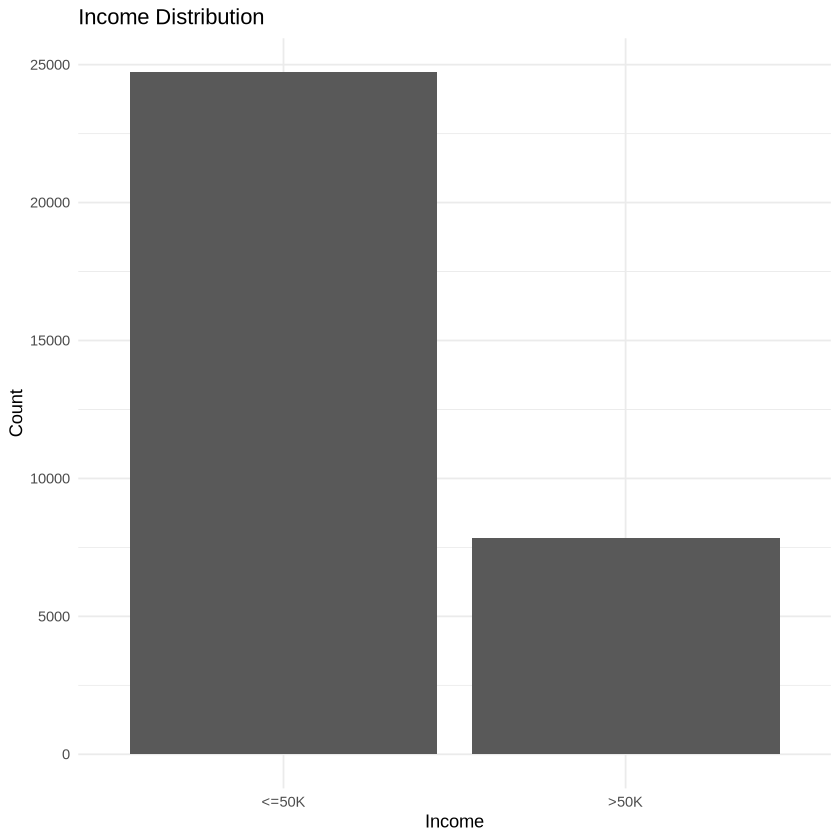

In [5]:
income_dist <- income |>
ggplot(aes(x = income_status)) +
geom_bar() +
labs(
    title = "Income Distribution",
    x = "Income",
    y = "Count"
  ) +
  theme_minimal()

income_dist


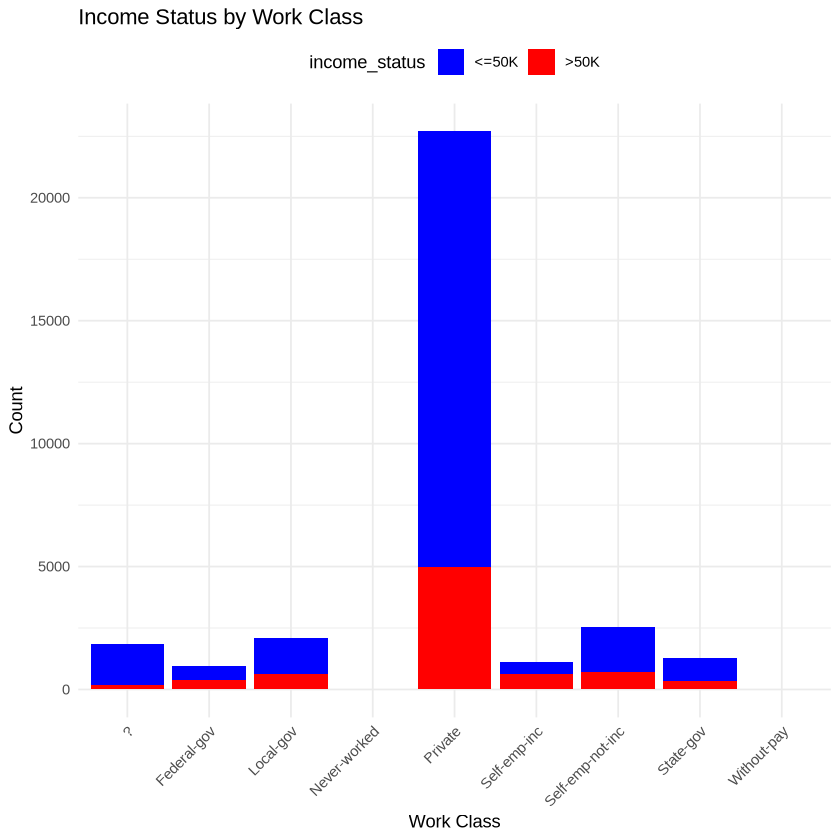

In [6]:
work_class_graph <- ggplot(income, aes(x = work_class, fill = income_status)) +
  geom_bar() +
  labs(x = "Work Class", y = "Count") +
  ggtitle("Income Status by Work Class") +
  scale_fill_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(legend.position = "top") +  # Move the legend to the top
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

# Adjust the dimensions of the plot
ggsave("your_plot.png", plot = work_class_graph, width = 10, height = 6, units = "in", dpi = 300)

work_class_graph

### Income Status By Race

We will also make a Race vs Income Status graph to help us visualize what we may expect from our findings. 

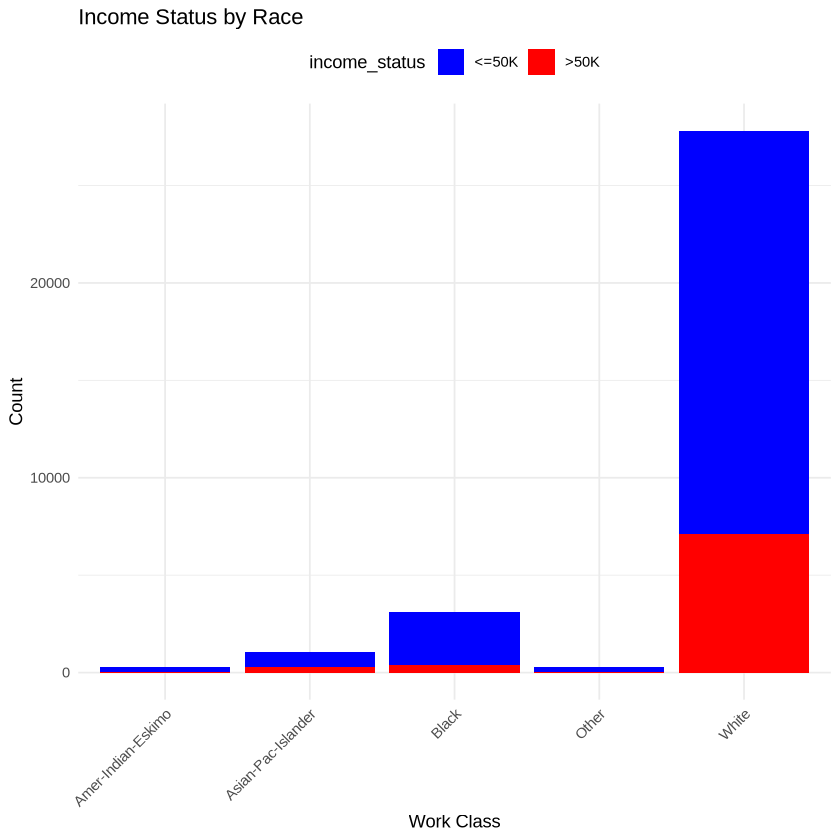

In [7]:
race_graph <- ggplot(income, aes(x = race, fill = income_status)) +
  geom_bar() +
  labs(x = "Work Class", y = "Count") +
  ggtitle("Income Status by Race") +
  scale_fill_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(legend.position = "top") +  # Move the legend to the top
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

# Adjust the dimensions of the plot
ggsave("your_plot.png", plot = race_graph, width = 10, height = 6, units = "in", dpi = 300)

race_graph

We can see that there is a huge difference between the number of people earning <= 50K and number of people earning >50K across all races. We can also see that Since we can see that the the majority of the sample is Black or White, we will use these 2 races in our hypothesis tests. 

### Income Status by Gender

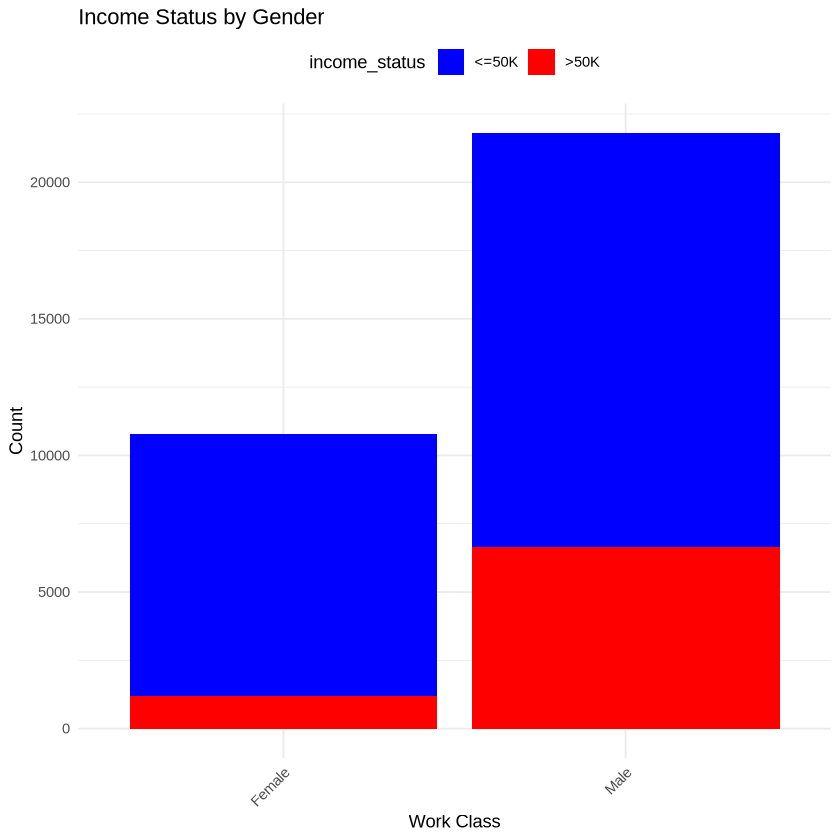

In [8]:
sex_graph <- ggplot(income, aes(x = sex, fill = income_status)) +
  geom_bar() +
  labs(x = "Work Class", y = "Count") +
  ggtitle("Income Status by Gender") +
  scale_fill_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(legend.position = "top") +  # Move the legend to the top
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

# Adjust the dimensions of the plot
ggsave("your_plot.png", plot = work_class_graph, width = 10, height = 6, units = "in", dpi = 300)

sex_graph

We can see that there is a huge change in the proportions of individuals earning >5Ok among males and the proportion of individuals earning >50K among females. The number of males >50K is significantly higher than the number of females earning >50K. Across both genders we also see that there is a significant difference between the proportion of individuals earning >50K and the proportion of individuals earning <=50K.

# Methods

Plots and estimates alone do not quantify the statistical significance of the observed differences. Stakeholders need to know whether the differences are likely to be real or if they could have occurred by random chance. In order to provide a more robust analysis, we will plan to do the following.
In the first step, we plan to use Z-test for the proportion of individuals earning >50K among different racial groups, using the following steps:

## Hypothesis Testing with Z-Test for Location Parameter (Proportion of individuals earning >50K in each racial group):

1. Null Hypothesis (H0 location): There is no significant difference in the proportion of individuals with income >50K among different racial groups.

    H0_location: p1(>50K) = p2(>50K) = p3(>50K) = ... (where p1, p2, p3, etc. represent the proportions of individuals with income >50K for each racial group). 
      
      
2. Alternative Hypothesis (H1 location): There is a significant difference in the proportion of individuals with income >50K among different racial groups.

    H1_location: At least one proportion of income >50K differs from the others.
    
    
        
3. Calculate Proportions: Calculate the proportion of individuals with income >50K for each racial group.

4. Pairwise Z-Tests: Perform pairwise z-tests to compare proportions between racial groups. For each pair of groups, calculate the z-statistic and p-value to assess the difference in proportions.

5. Statistical Significance: The p-values from the z-tests quantify the likelihood of observing differences in proportions by random chance. Low p-values suggest significant differences, while high p-values indicate no significant differences.


Our next step would be repeating this process for sex, as our second parameter. 


## Hypothesis Testing with Z-Test for Location Parameter (Proportion of individuals earning >50K in each gender group):
1. Null Hypothesis (H0_location): There is no significant difference in the proportion of individuals with income >50K among males and females.

        - H0_location: p1(>50K) = p2(>50K) (where p1, p2 represent the proportions of individuals with income >50K for male and female respectively).
        

2. Alternative Hypothesis (H1_location): There is a significant difference in the proportion of individuals with income >50K among  males and females.

        - H1_location: p1(>50K) not equal to p2(>50K)
        
3. Calculate Proportions: Calculate the proportion of individuals with income >50K for each group.

4. Pairwise Z-Tests: Perform pairwise z-test to compare proportions between the 2 groups. Calculate the z-statistic and p-value to assess the difference in proportions.

5. Statistical Significance: The p-value from the z-test quantify the likelihood of observing differences in proportions by random chance. Low p-values suggest significant differences, while high p-values indicate no significant differences

Displays the dataset with sex, and income status.

In [14]:
income_sex <- income %>%
    select(sex, income_status)

head(income_sex)

sex,income_status
<chr>,<chr>
Male,<=50K
Male,<=50K
Male,<=50K
Male,<=50K
Female,<=50K
Female,<=50K


Here we calculate the total number of males and females in the dataset.

In [40]:
n_male <- sum(income_sex$sex == "Male")
n_female <- sum(income_sex$sex == "Female")

cat("There are", n_male, "males in this dataset\n")
cat("There are", n_female, "females in this dataset\n")

There are 21790 males in this dataset
There are 10771 females in this dataset


Then, we calculate the male sample proportion ($\hat{p}_{male}$), female sample proportion ($\hat{p}_{female}$) and the pooled proportion $\hat{p}$

In [62]:
phat_male <- income_sex %>%
    filter(sex == "Male", income_status == ">50K") %>%
    summarize(phat = n()/n_male) %>%
    pull()

phat_female <- income_sex %>%
    filter(sex == "Female", income_status == ">50K") %>%
    summarize(phat = n()/n_female) %>%
    pull()

phat <- (n_male*phat_male + n_female*phat_female) / (n_male + n_female)

cat("Male sample proportion = ", phat_male, "\n")
cat("Female sample proportion = ", phat_female, "\n")
cat("Pooled sample proportion = ", phat)

Male sample proportion =  0.3057366 
Female sample proportion =  0.1094606 
Pooled sample proportion =  0.2408096

Finally, we calculate the test statistic and use it to obtain the p-value 

In [63]:
test_statistic <- (phat_male - phat_female) / sqrt(phat*(1-phat)*(1/n_male + 1/n_female))
p_value <- pnorm(test_statistic, lower.tail = FALSE) *2

cat("Test Statistic = ", test_statistic, "\n")
cat("P-value = ", p_value)

Test Statistic =  38.9729 
P-value =  0

Below is a summary

In [64]:
summary <- 
    tidy(prop.test(x = c(n_male*phat_male, n_female*phat_female), 
              n = c(n_male, n_female), 
              correct = FALSE))
summary

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.3057366,0.1094606,1518.887,0,1,0.1877797,0.2047722,2-sample test for equality of proportions without continuity correction,two.sided


Conclusion: <p>
    Since the p-value is 0, it is below the significance level. Therefore, we conclude that at a 5% significance level, we reject the null-hypothesis that there is no significant difference in the proportion of individuals with income >50K among males and females


## Confidence Intervals with Bootstrapping:
1. Parameter of Interest: The proportion of individuals with income >50K for each racial group and gender group.

2. Bootstrapping: We will use bootstrapping, a resampling method, to estimate confidence intervals for proportions. This method involves repeatedly drawing random samples (with replacement) from our data to simulate a range of possible sample outcomes.

3. Bootstrap Function: We will create a function that calculates proportions from each resampled dataset. This function calculates proportions for each racial and gender group using the resampled data.

4. Resampling: We will resample our data multiple times (e.g., 1,000 times) to create a collection of simulated datasets.

5. Calculate Proportions: For each resampled dataset, we aim to calculate proportions for each racial and gender group.

6. Estimate Confidence Intervals: Using the proportions calculated from the resampled datasets, we will lastly estimate confidence intervals. These intervals represent a range of plausible values for the proportion of individuals with income >50K for each racial group.

7. Interpretation: The confidence intervals provide a range within which the true proportion is likely to fall with a certain level of confidence (e.g., 95%). Wider intervals indicate greater uncertainty, while narrower intervals suggest more precise estimates. They give stakeholders a clear understanding of the precision of your estimates. If the confidence intervals for different racial groups do not overlap, it further supports the evidence of income disparities and that there is a statistically significant difference.

## Expected Findings and Further Implications:
We expect to find that the estimated proportions of individuals with income >50K vary among different racial and gender groups. The confidence intervals for each racial and gender group will provide insight into the range of plausible values for these proportions. It is likely that some groups will have a higher proportion of individuals with income >50K, while others may have lower proportions. The analysis will quantify the magnitude of these disparities and provide a more precise understanding of income inequalities among different racial and gender categories.

The findings of this report can have a substantial impact on policy decisions and social awareness. Clear evidence of income disparities among racial and gender groups can draw attention to social and economic inequalities that may require targeted interventions.

Policymakers, advocacy groups, and researchers can use the results to design and implement policies and programs aimed at reducing income disparities, promoting economic equity, and addressing the root causes of these disparities. For example, this may include creating tax cuts or incentives for disadvantaged groups, implementing policies that can affect income, or increasing spending on education to address disparities within specific racial and gender groups.

The report will also lead to future questions that can be answered through more data analysis. How do other demographic variables, such as age, education, and marital status, intersect with race and gender to influence income disparities? Exploring intersectionality can provide a more nuanced understanding of the factors at play.

Can specific policies or interventions effectively reduce income disparities among diverse racial and gender groups? Further research can evaluate the impact of various interventions and programs and provide valuable insights into addressing disparities within specific demographic subgroups.


## References
1. Akee, R., Jones, M., & Porter, S. (2017). Race matters: Income shares, income inequality, and income mobility for all U.S. races. NATIONAL BUREAU OF ECONOMIC RESEARCH. https://doi.org/10.3386/w23733 
The researches examine the universe of tax filers for the US over the period of 2000 - 2014 by race and ethnic group. Through the use of restricted IRS tax data and US Census race and ethnicity data, they have found that there are large differences in income shares across race and ethnic groups over the time period. There is specifically a persistence of disadvantage of certain minority groups relative to Whites at every point in the income distribution. Blacks, Hispanics, and American Indians tend to be clustered at the low end while White and Asians tend to accrue higher income shares at all points in time.  
This paper shows the systematic differences between races and how there is a significant difference between an individuals race and their income and how this difference is persistent across a significant period of time.

2. Bertrand, M. (2003). Are Emily and Greg more employable than lakisha and Jamal? A field experiment on labor market discrimination. NATIONAL BUREAU OF ECONOMIC RESEARCH. https://doi.org/10.3386/w9873 

This was a field experiment conducted to measure racial discrimination in the labor market by responding with fictitious resumes to help wanted ads in Boston & Chicago newspaper. The researchers assigned resumes either a very African American sounding name or a very White Sounding name. The results show statistically significant discrimination against African-American names: White names receive 50% higher callbacks for interviews and that race affects the benefits of a better resume. 

These results show that race already inherecently affect call back and thus the likelihood of obtaining a job which consequently can impact the average income a race group obtains.
